<h1>HELLO WORLD COM O DATASET TITANIC DO KAGGLE</h1>

<P> O site kaggle é um site de competições relacionadas a dados, onde você deve encontrar<br> um modelo que obtenha a melhor acurácia com os dados de submissão</p>

<h3>O desenvolvimento deste caderno foi desenvolvido nas seguintes etapas:</h3>
    <ul>
        <li>Análise de dados e visualização</li>
        <li>Feature engineering e correção de dados</li>
        <li>Criação dos modelos e previsões</li>
      </ul>

<b>Importações necessárias</b>

In [1]:
##Imports para data handling e visualização 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

##imports relacionados a criação dos modelos
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate, GridSearchCV

<b>Importando dados necessários</b>

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sns.set_style("darkgrid")

<b>Avaliando o dataset</b>

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>O que temos ai?</h3><br>
    <b>A tabela consiste nas seguintes colunas:</b>
    <ul>
        <li><b>Survived: </b>Valores 0 para morto e 1 para vivo</li>
        <li><b>Pclass: </b>Classe dos passageiros</li>
        <li><b>Name: </b>Nome dos passageiros</li>
        <li><b>Sex: </b>Autoexplicativo</li>
        <li><b>Age: </b>Autoexplicativo</li>
        <li><b>SibSp: </b>Número de irmãos/cônjuges a bordo</li>
        <li><b>Parch: </b>Número de parentes a bordo</li>
        <li><b>Ticket: </b>Ticket do passageiro</li>
        <li><b>Fare: </b>Tarifa do passageiro</li>
        <li><b>Cabin: </b>Cabine do passageiro</li>
        <li><b>Embarked: </b>Local onde foio embarcado</li>
     </ul>

In [5]:
##Verificar valores nulos e o formatos dos dados
train_df.info()
print("____________________________________\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
____________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null ob

<h3>Dados Nulos</h3>
    <p>É possível observar que a idade e a cabine tem vários dados nulos. Mais a frente<br>
    tratarei esses dados de alguma forma</p>

<h3> Distribuição dos dados </h3>

In [6]:
##Verificar como os dados estão distribuidos, 
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


 <p>O método <b>describe</b> do Pandas é muito útil, ele mostra um "resumão" de como os dados estão distribuidos, com isso é possível retirar informações muito importantes. Para mim essas informações foram muito úteis no tratamento dos dados nulos que será feito mais a frente.</p>
    <p>Logo de cara já é possível notar uma variância muito alta na tarifa dos passageiros, que pode ser causado por outliers.</p>
    
 <h3>Visualização de Dados</h3>
 <p>Agora é hora de procurar relações nos dados, o que podemos dizer sobre a sobrevivência relacionada ao sexo? e em relação a classe? e etc.. essas são algumas perguntas a se fazer e observar com gráficos ou outros métodos</p>

In [8]:
train_df[["Survived", "Sex"]].groupby("Sex", as_index = False).mean().sort_values(by = "Survived", ascending = False)
##É possivel ver que mulheres tinha chances mais altas de sobreviver

,Sex,Survived
0,female,0.742038
1,male,0.188908


<p>De cara já é possível ver algo muito importante: <b>As mulheres tinham muito mais chance de sobreviver</b></p>

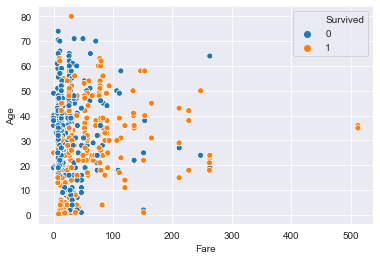

In [9]:
sns.scatterplot(train_df["Fare"], train_df["Age"], train_df["Survived"])

<p> Aqui também tem algo bem explicito: <b>Quase todas pessoas de classe mais alta sobreviveram</b>
 <p>O que nós leva a crer que pessoas de classe mais alta e de sexo feminino teriam preferência na hora de se salvar</p>

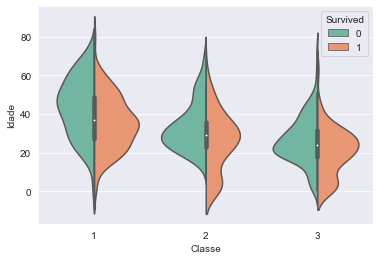

In [10]:
fig = sns.violinplot(x = "Pclass", y = "Age", hue = "Survived",palette = "Set2", data = train_df, split = True)
fig.set(xlabel = "Classe", ylabel = "Idade")
plt.show()

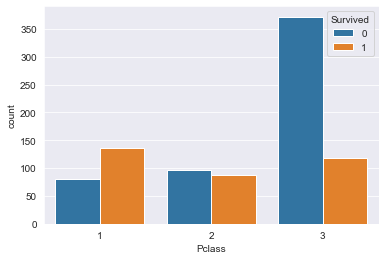

In [11]:
sns.countplot(x = "Pclass", hue = "Survived", data = train_df)

In [12]:
train_df[["Survived", "Pclass"]].groupby("Pclass", as_index = False).mean().sort_values(by = "Survived", ascending = False)
#É possivel ver também que quanto mais rico, maior sua chance de sobreviver

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Sexo x Sobreviventes x Classe')

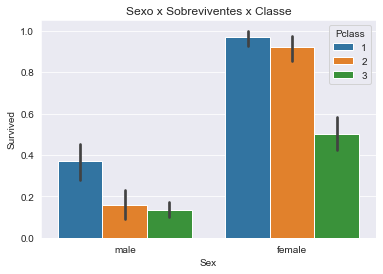

In [13]:
sns.barplot(train_df["Sex"], train_df["Survived"], train_df["Pclass"]).set_title("Sexo x Sobreviventes x Classe")
##Independente da classe, as mulheres tem mais chance de sobr.

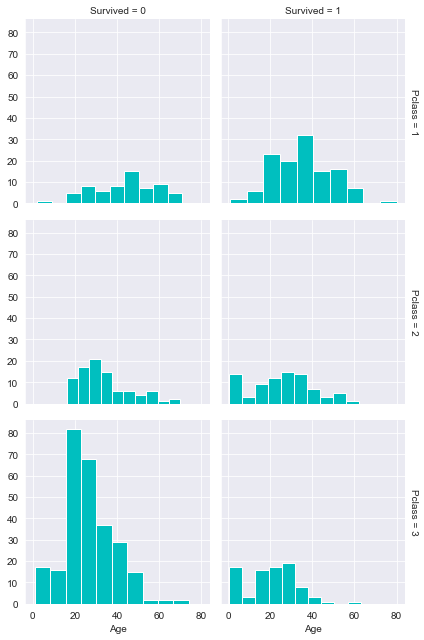

In [14]:
plot = sns.FacetGrid(train_df, row="Pclass", col="Survived", margin_titles=True)
plot.map(plt.hist, "Age", color = "c")

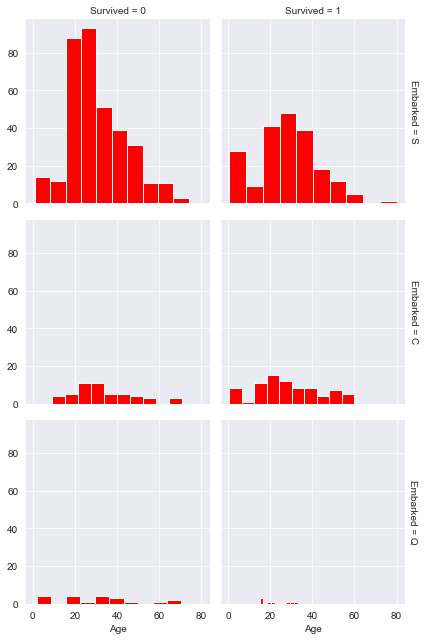

In [15]:
plot = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", margin_titles = True)
plot.map(plt.hist, "Age", color = "r" )

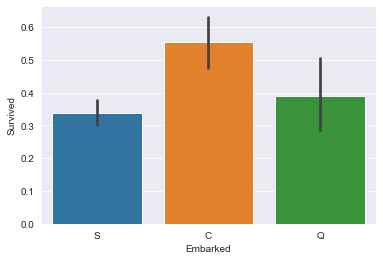

In [16]:
sns.barplot(train_df["Embarked"], train_df["Survived"])

<p> Acima foi plotado alguns gráficos para visualizar as relações na taxa de sobrevivência dos passageiros</p>
<h2> Feature Engineering e limpeza dos dados</h2>
<p> Agora começa a parte de moldar nossos dados, criar novas features mais interessantes e cuidar dos dados nulos</p>

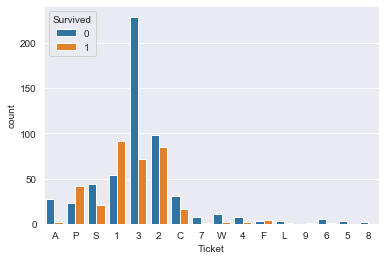

In [17]:
train_df['Ticket'] = train_df["Ticket"].str.split("").str.get(1)
test_df['Ticket'] = test_df['Ticket'].str.split("").str.get(1)
sns.countplot(train_df["Ticket"], hue = train_df["Survived"])

In [18]:
train_df[["Survived", "Ticket"]].groupby("Ticket", as_index = False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


<p>Ao observar os Tickets é possível observar uma relação importante cpm  o primeiro caracter dos tickets, e assim<br>
ao invés de excluir, podemos criar essa nova que será útil para o modelo</p>

<h3>Agora a cabine</h3>
<p>Outra feature desinteressante para o modelo é a das cabines, a quantidade de dados nulos da cabine é gigangte, excluir a coluna poderia ser uma opção. Pórem podemos pensar em criar uma classe para esses dados nulos como "N" e ver se ela poderia ser util para o modelo</p>

In [19]:
df = [train_df, test_df]
for data in df:
    data["Cabin"] = data["Cabin"].fillna("N")
    data["Cabin"] = data["Cabin"].str.split("").str.get(1)

In [20]:
train_df[["Survived", "Cabin"]].groupby("Cabin", as_index = False).mean()

,Cabin,Survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000
7,N,0.299854
8,T,0.000000


<p>E é possível ver que a cabine se tornou uma feature até interessante, apesar de que tratamentos muito melhores
e mais complexos poderiam ser feitos, como prever a cabine dos passageiros. Mas vai ficar o "N" mesmo</p>

<h3>Vamos para os nomes</h3>
<p>O nome dos passageiros não parece ter informações úteis, mas se olhar melhor o nome de cada passageiro contêm um titulo
    associado ao passageiros, e esse titulo pode ser útil</p>

In [21]:
for data in df:
    data["Titulo"] = data.Name.str.split(", ").str[1]
    data["Titulo"] = data["Titulo"].str.split(".").str[0]

In [22]:
pd.crosstab(train_df["Titulo"], train_df["Sex"])

Sex,female,male
Titulo,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [23]:
for data in df:
    data['Titulo'] = data['Titulo'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')
    data["Titulo"] = data["Titulo"].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], "Miss/Mr/Ms")
train_df[["Survived", "Titulo"]].groupby("Titulo").mean()

,Survived
Titulo,
Dr/Military/Noble/Clergy,0.285714
Master,0.575000
Miss/Mr/Ms,0.741214
Mr,0.156673


E de fato o título se tornou mais interessante que apenas o nome, agora a coluna nome não é mais interessante<br><br>
<b> E o dataset está assim por enquanto:</b>

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,N,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C,C,Miss/Mr/Ms
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,7.9250,N,S,Miss/Mr/Ms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,53.1000,C,S,Miss/Mr/Ms
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,3,8.0500,N,S,Mr


<b>É importante transformar os dados de categóricos para númericos, para não ter problemas com o modelo</b>

In [25]:
for data in df:
    data["Titulo"] = data["Titulo"].map({"Mr" : 0, "Miss/Mr/Ms" : 1, "Master" : 2, "Dr/Military/Noble/Clergy" : 3})

In [26]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,892,3,"Kelly, Mr. James",male,34.5,0,0,3,7.8292,N,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,3,7.0000,N,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,2,9.6875,N,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,3,8.6625,N,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3,12.2875,N,S,1


In [27]:
df = [train_df, test_df]
for data in df:
    data["Sex"] = data["Sex"].map({"female": 0, "male": 1})

In [28]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,892,3,"Kelly, Mr. James",1,34.5,0,0,3,7.8292,N,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,3,7.0000,N,S,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,2,9.6875,N,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,3,8.6625,N,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3,12.2875,N,S,1


In [29]:
for data in df:
    data.drop(["Name"], axis = 1, inplace = True)

In [30]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,892,3,1,34.5,0,0,3,7.8292,N,Q,0
1,893,3,0,47.0,1,0,3,7.0000,N,S,1
2,894,2,1,62.0,0,0,2,9.6875,N,Q,0
3,895,3,1,27.0,0,0,3,8.6625,N,S,0
4,896,3,0,22.0,1,1,3,12.2875,N,S,1


In [31]:
for data in df:
    data["Embarked"] = data["Embarked"].fillna("S")

<p>A coluna embarked tem um dados nulo, como é apenas um podemos substituir pela moda sem problemas</p>

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Titulo         891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [33]:
for data in df:
    data["Embarked"] = data["Embarked"].map({"S":0, "C":1, "Q":2})

In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,1,0,3,1,22.0,1,0,A,7.2500,N,0,0
1,2,1,1,0,38.0,1,0,P,71.2833,C,1,1
2,3,1,3,0,26.0,0,0,S,7.9250,N,0,1
3,4,1,1,0,35.0,1,0,1,53.1000,C,0,1
4,5,0,3,1,35.0,0,0,3,8.0500,N,0,0


<h3>Ajeitando a idade</h3>
<p>A coluna age tem muitos dados nulos, poderiamos simplesmente substituir pela média, mas isso poderia ser bem ruim. 
<br>A idade pode ser melhor corrigída se usarmos a média de acordo com a classe e o sexo para substituir os dados nulos, isso que o algoritmo abaixo faz</p>

In [35]:
df = [train_df, test_df]
matriz = np.zeros([2,3])
for i in range(2):
    for j in range(3):
        media = train_df.loc[(train_df["Sex"] == i) & (train_df["Pclass"] == j + 1 ), "Age"].mean()
        
        matriz[i][j] = round(media)

for data in df:
    for i in range(2):
        for j in range(3):
            data.loc[(data["Sex"] == i) & (data["Pclass"] == j + 1), "Age"] =  data.loc[(data["Sex"] == i) & (data["Pclass"] \
            == j + 1), "Age"].fillna(matriz[i][j])
    data["Age"] = data["Age"].astype(int)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null int64
Titulo         891 non-null int64
dtypes: float64(1), int32(1), int64(8), object(2)
memory usage: 80.2+ KB


<p> Agora o dataset não tem mais dados nulos, e está quase pronto, resta apenas transformar os dados e criar uma nova feature com o tamanho da família para criar o modelo</p>

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,1,0,3,1,22,1,0,A,7.2500,N,0,0
1,2,1,1,0,38,1,0,P,71.2833,C,1,1
2,3,1,3,0,26,0,0,S,7.9250,N,0,1
3,4,1,1,0,35,1,0,1,53.1000,C,0,1
4,5,0,3,1,35,0,0,3,8.0500,N,0,0


In [38]:
train_df["Age"] = pd.cut(train_df["Age"], 10)
interv = train_df["Age"].unique()
for i in test_df["Age"].unique():
    for a in interv:
        if (test_df.loc[test_df["Age"] == i, "Age"].unique()[0] in a):
            test_df.loc[test_df["Age"] == i, "Age_interv"] = a

<p> Confesso que o número de intervalos para a idade foi arbitrário, mas poderia se usar os quartis por exemplo, ou algum outro método mais inteligente</p>

In [39]:
test_df["Age_interv"]

0      (32.0, 40.0]
1      (40.0, 48.0]
2      (56.0, 64.0]
3      (24.0, 32.0]
4      (16.0, 24.0]
           ...     
413    (24.0, 32.0]
414    (32.0, 40.0]
415    (32.0, 40.0]
416    (24.0, 32.0]
417    (24.0, 32.0]
Name: Age_interv, Length: 418, dtype: object

In [40]:
##Transformando a idade para númerico
labelencoder = LabelEncoder()
for data in df:
    data["Age"] = labelencoder.fit_transform(data["Age"])

In [41]:
test_df["Age"] = labelencoder.fit_transform(test_df["Age_interv"])

In [42]:
test_df.drop("Age_interv", axis = 1, inplace = True)

In [43]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,892,3,1,4,0,0,3,7.8292,N,2,0
1,893,3,0,5,1,0,3,7.0000,N,0,1
2,894,2,1,7,0,0,2,9.6875,N,2,0
3,895,3,1,3,0,0,3,8.6625,N,0,0
4,896,3,0,2,1,1,3,12.2875,N,0,1


In [44]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo
0,1,0,3,1,2,1,0,A,7.2500,N,0,0
1,2,1,1,0,4,1,0,P,71.2833,C,1,1
2,3,1,3,0,3,0,0,S,7.9250,N,0,1
3,4,1,1,0,4,1,0,1,53.1000,C,0,1
4,5,0,3,1,4,0,0,3,8.0500,N,0,0


In [45]:
##Aqui cria o tamanho da família, que pode ser um feature interessante
for data in df:
    data["TamFamilia"] = 0
    data["TamFamilia"] = data["Parch"] + data["SibSp"]
train_df[["TamFamilia", "Survived"]].groupby("TamFamilia", as_index = False).mean()

,TamFamilia,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


In [46]:
for data in df:
    data["Sozinho"] = 1
    data.loc[(data["TamFamilia"] > 0), "Sozinho"] = 0 

In [47]:
train_df[["Survived", "Sozinho"]].groupby("Sozinho").mean()

,Survived
Sozinho,
0,0.505650
1,0.303538


<p>O tamanho da familia poderia ser um feature interessante, pórem depois de pesquisas e testes optei por altera-lá para verificar<br>
se o passageiro estava sozinho ou não, que obteve melhores resultados</p>

In [48]:
train_df.drop("TamFamilia", axis = 1, inplace = True)

In [49]:
test_df.drop("TamFamilia", axis = 1, inplace = True)

<h3>Finalizndo</h3>
    
<p> Agora resta apenas dividir a coluna <b>Fare</b> em intervalos para criar o modelo.<br>
Ela foi dividida em 4 intervalos, também escolhido arbitrariamente, pórem métodos mais lógicos e inteligente poderiam ser<br>
utilizados, como utilizar os quartis</p>

In [50]:
train_df["Fare"] = pd.qcut(train_df["Fare"], 4)

In [51]:
train_df["Fare"].values

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (31.0, 512.329], (7.91, 14.454], ..., (7.91, 14.454], (14.454, 31.0], (14.454, 31.0], (14.454, 31.0], (-0.001, 7.91]]
Length: 891
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [52]:
##Criando o intervalo para o teste e o treino
test_df.loc[test_df["PassengerId"] == 1235, "Fare"] -= 1
x = test_df["Fare"].median()
test_df["Fare"] = test_df["Fare"].fillna(x)
interv = train_df["Fare"].unique()
for i in test_df["Fare"].unique():
    for a in interv:
        if (test_df.loc[test_df["Fare"] == i, "Fare"].unique()[0] in a):
            test_df.loc[test_df["Fare"] == i, "Fare_interv"] = a

In [53]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo,Sozinho,Fare_interv
0,892,3,1,4,0,0,3,7.8292,N,2,0,1,"(-0.001, 7.91]"
1,893,3,0,5,1,0,3,7.0000,N,0,1,0,"(-0.001, 7.91]"
2,894,2,1,7,0,0,2,9.6875,N,2,0,1,"(7.91, 14.454]"
3,895,3,1,3,0,0,3,8.6625,N,0,0,1,"(7.91, 14.454]"
4,896,3,0,2,1,1,3,12.2875,N,0,1,0,"(7.91, 14.454]"


In [54]:
##Categórico para númerico
train_df["Fare"] = labelencoder.fit_transform(train_df["Fare"])
test_df["Fare"] = labelencoder.fit_transform(test_df["Fare"])

In [55]:
test_df.head()
test_df.drop("Fare_interv", axis = 1, inplace = True)

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo,Sozinho
0,1,0,3,1,2,1,0,A,0,N,0,0,0
1,2,1,1,0,4,1,0,P,3,C,1,1,0
2,3,1,3,0,3,0,0,S,1,N,0,1,1
3,4,1,1,0,4,1,0,1,3,C,0,1,0
4,5,0,3,1,4,0,0,3,1,N,0,0,1


In [57]:
train_df.shape, test_df.shape

((891, 13), (418, 12))

In [58]:
##Essa coluna não é necessária no modelo
train_df.drop("PassengerId", axis = 1, inplace = True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titulo,Sozinho
0,0,3,1,2,1,0,A,0,N,0,0,0
1,1,1,0,4,1,0,P,3,C,1,1,0
2,1,3,0,3,0,0,S,1,N,0,1,1
3,1,1,0,4,1,0,1,3,C,0,1,0
4,0,3,1,4,0,0,3,1,N,0,0,1


In [59]:
train_df["Cabin"] = labelencoder.fit_transform(train_df["Cabin"])
test_df["Cabin"] = labelencoder.fit_transform(test_df["Cabin"])
train_df["Ticket"] = labelencoder.fit_transform(train_df["Ticket"])
test_df["Ticket"] = labelencoder.fit_transform(test_df["Ticket"])

In [60]:
##Colunas desnecessárias
for data in df:
    data.drop(["SibSp", "Parch"], axis = 1, inplace = True)

<h2>Criação dos modelos e previsões</h2>
<p>Agora resta criar o modelo, mas qual escolher? A partir de testes usando o cross-validation (Removido do caderno para não<br> poluir ), o modelo que obteve uma melhor acurácia com os dados<br> de treino foi utilizando o algoritmo de floresta aleátoria, e seguido pelo Gradient boosting. Para a escolha de hierparâmetros o grid search foi utilizado

In [61]:
##Escolha dos hiperparâmetros
modelo = RandomForestClassifier()
params = {"n_estimators": [2, 4, 6, 12, 24, 36, 48, 64, 100, 200, 10],
             'max_depth': [80, 90, 100, 110],
            'min_samples_leaf': [3, 4, 5, 8],}
grid = GridSearchCV(modelo, param_grid = params, cv = 5)
grid.fit(train_df.iloc[:, 1:], train_df["Survived"])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [62]:
grid.best_params_

{'max_depth': 100, 'min_samples_leaf': 4, 'n_estimators': 10}

In [68]:
modelo = RandomForestClassifier(n_estimators = 10, max_depth = 100, min_samples_leaf = 4)
modelo.fit(train_df.iloc[:, 1:], train_df["Survived"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<h2>Importância das features</h2>
<p>É possível ver os features que mais são importantes para o modelo, com o método <b>feature_importances_</b>, apesar de
não ser uma função muito confiável, por ser dependente dos hiperparâmetros da random forest</p>

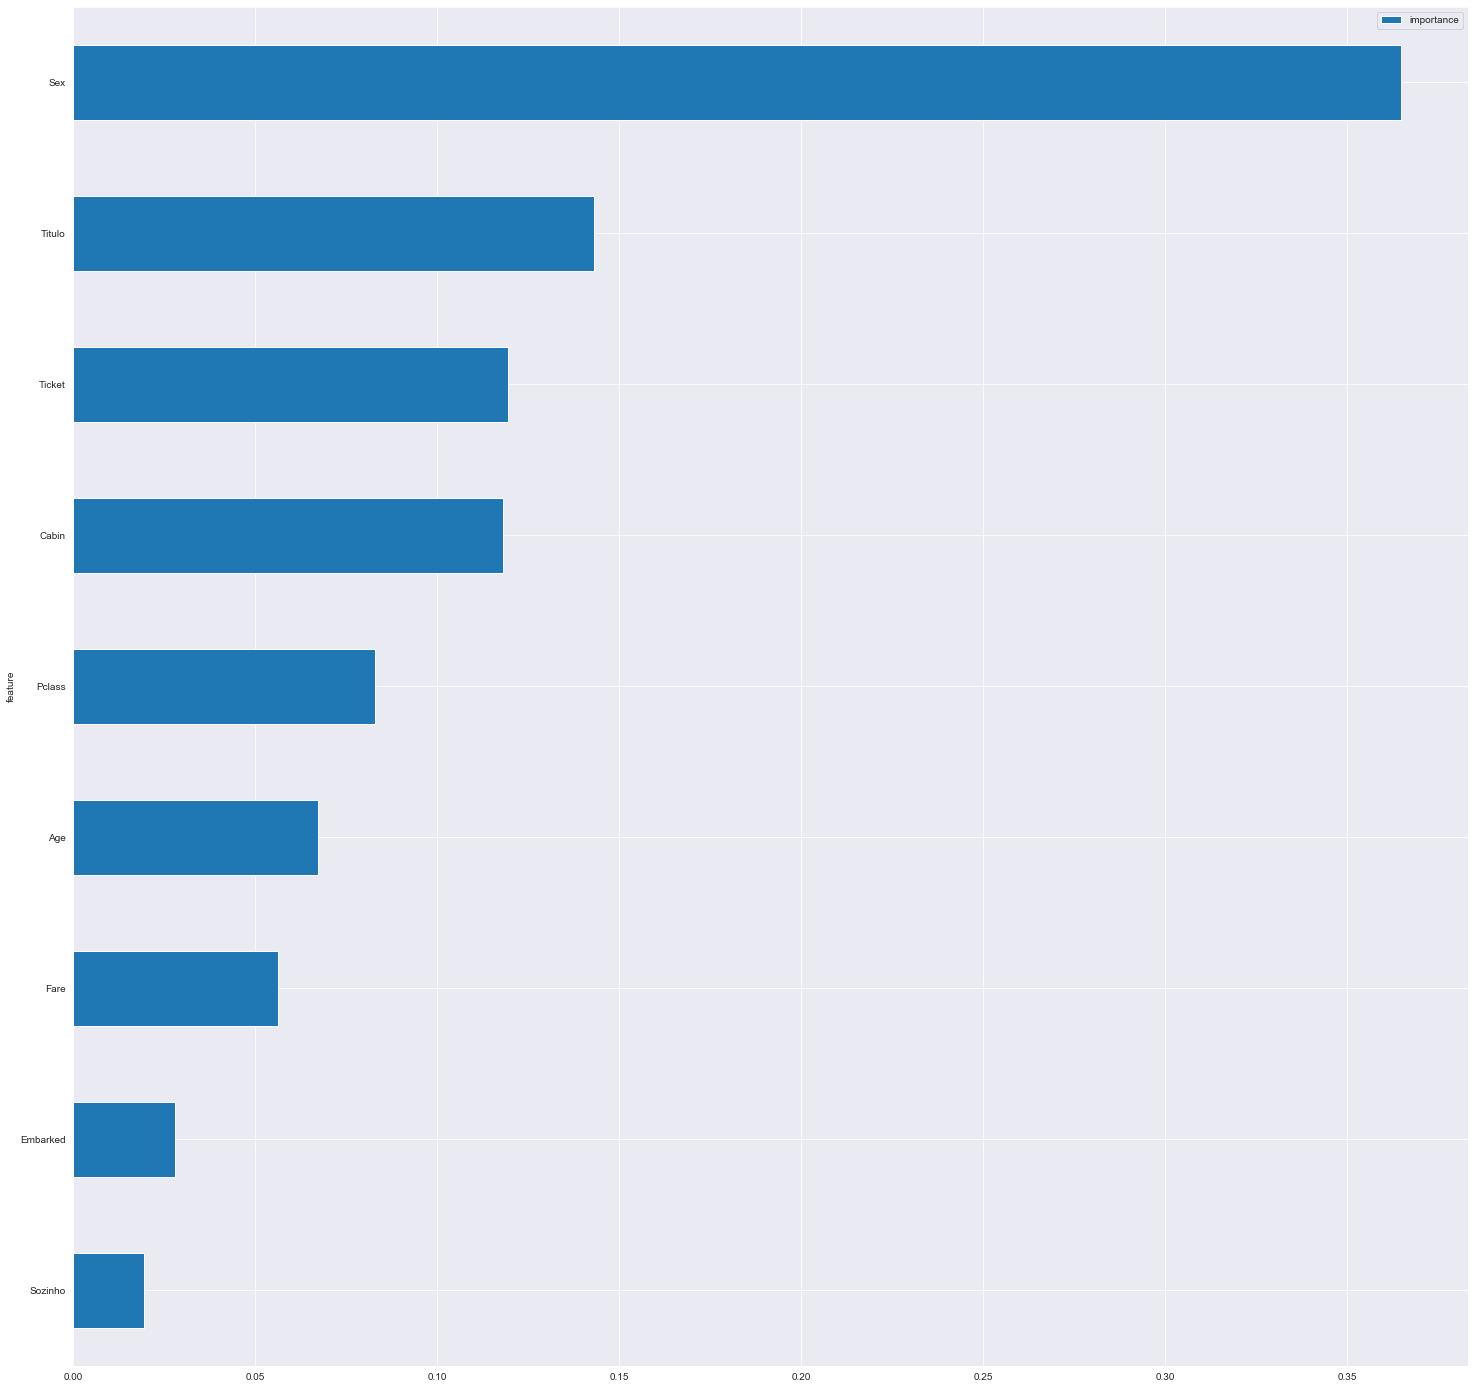

In [69]:
features = pd.DataFrame()
features['feature'] = train_df.iloc[:, 1:].columns
features['importance'] = modelo.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

In [70]:
submission = pd.DataFrame(data = test_df["PassengerId"])

In [71]:
submission["Survived"] = modelo.predict(test_df.iloc[:, 1:])

In [72]:
submission.to_csv("submissao.csv", index = None)

<h2>Fim</h2>
<p>Ao finalizar tudo e submeter o arquivo no kaggle a pontuação adquirida foi de <b>0.79425</b></p>